#Training Without CutOut

In [1]:
# Installing Keras Library and importing the same.
# Reference: https://keras.io/
from keras import backend as K

import time
# Matplot library used for plotting images and charts
import matplotlib.pyplot as plt

# Numpy is library used for efficient high level mathemtical processing on multi dimensional arrays
import numpy as np
% matplotlib inline
np.random.seed(2017) 

# Keras provides a Sequential model API. This is way of creating a linear stack of layers while creating models.
from keras.models import Sequential

# Convolution2D will be used to create a convolution kernel that is convolved with the layer input to produce a tensor of outputs
from keras.layers.convolutional import Convolution2D, MaxPooling2D

# Flatten provided by Keras will be used to convert a multidimensional tensor into a single 1-D tensor
from keras.layers import Activation, Flatten, Dropout
from keras.layers.normalization import BatchNormalization

# Import np_utils from keras
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# Loads CIFAR10 dataset
# 'features' values will have images, 'labels' will have the names represented by the corresponding 'feature' image
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
#Connecting Gdrive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


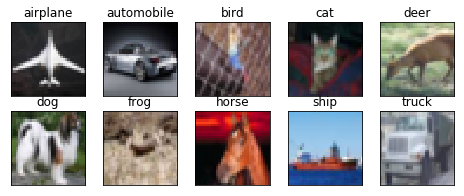

In [4]:
# Let's see some random features(images) with labels from training dataset
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# Function to plot charts showing 'Model Accuracy vs Epoch' and 'Model Loss vs Epoch'
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
# Function to calculate the Test Accuracy on test dataset
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
# Why Float32?
# Using a 32 bit precision is a common approach in neural network training.
# Reason behind is that to make sure that the dataset fits easily in RAM.

# Why dividing by 255?
# 255 is the max pixel value in an image. Dividing all pixel values by 255 ensures that the input features are scaled between 0.0 and 1.0
# Reason behind to scale between 0.0 and 1.0 is to make sure default learning rate works well.

train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [133]:
# Initializing Sequential API as we will be creating model in a linear stack way
model = Sequential()

######################BLOCK STARTS##############################################
# Input Dimension  = 32x32x3
# Kernel           = 3x3x3
# No:of Kernels    = 64
# Output Dimension = 32x32x64 (Here,64 is the number of channels)
# Receptive Field  = 3x3  
model.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
######################BLOCK ENDS################################################


######################BLOCK STARTS##############################################
# Input Dimension  = 32x32x64
# Kernel           = 3x3x64
# No:of Kernels    = 96
# Output Dimension = 32x32x96 (Here,96 is the number of channels)
# Receptive Field  = 5x5 
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
######################BLOCK ENDS################################################


######################BLOCK STARTS##############################################
# Input Dimension  = 32x32x96
# Kernel           = 3x3x96
# No:of Kernels    = 112
# Output Dimension = 32x32x112 (Here,112 is the number of channels)
# Receptive Field  = 7x7 
model.add(Convolution2D(112, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
######################BLOCK ENDS################################################


######################TRANSITION BLOCK STARTS###################################
# # Input Dimension  = 32x32x96
# # Kernel           = 1x1x96
# # No:of Kernels    = 64
# # Output Dimension = 32x32x64 (Here,64 is the number of channels)
# # Receptive Field  = 7x7
# # NOTE: 1x1 Kernels are used here for dimension(channel) reduction.
# # No effect on output resolution or receptive field
model.add(Convolution2D(64, 1))

# Input Dimension  = 32x32x64
# Maxpooling Dimension = 2x2 (Default is 2x2)
# Output Dimension = 16x16x64 (Here,64 is the number of channels)
# Receptive Field  = 14x14 
# NOTE: Maxpooling halves the resolution and doubles the receptive field
model.add(MaxPooling2D(pool_size=(2, 2)))
######################TRANSITION BLOCK ENDS#####################################


######################BLOCK STARTS##############################################
# Input Dimension  = 16x16x64
# Kernel           = 3x3x64
# No:of Kernels    = 96
# Output Dimension = 16x16x96 (Here,96 is the number of channels)
# Receptive Field  = 16x16 
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
######################BLOCK ENDS################################################


######################BLOCK STARTS##############################################
# Input Dimension  = 16x16x96
# Kernel           = 3x3x96
# No:of Kernels    = 112
# Output Dimension = 16x16x112 (Here,112 is the number of channels)
# Receptive Field  = 18x18 
model.add(Convolution2D(112, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
######################BLOCK ENDS################################################


######################TRANSITION BLOCK STARTS###################################
# # Input Dimension  = 16x16x112
# # Kernel           = 1x1x112
# # No:of Kernels    = 64
# # Output Dimension = 16x16x64 (Here,64 is the number of channels)
# # Receptive Field  = 18x18
# # NOTE: 1x1 Kernels are used here for dimension(channel) reduction.
# # No effect on output resolution or receptive field
model.add(Convolution2D(64, 1))

# Input Dimension  = 16x16x64
# Maxpooling Dimension = 2x2 (Default is 2x2)
# Output Dimension = 8x8x64 (Here,64 is the number of channels)
# Receptive Field  = 36x36 
# NOTE: Maxpooling halves the resolution and doubles the receptive field
model.add(MaxPooling2D(pool_size=(2, 2)))
######################TRANSITION BLOCK ENDS#####################################


######################BLOCK STARTS##############################################
# Input Dimension  = 8x8x64
# Kernel           = 3x3x64
# No:of Kernels    = 96
# Output Dimension = 8x8x96 (Here,96 is the number of channels)
# Receptive Field  = 38x38 
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
######################BLOCK ENDS################################################


######################BLOCK STARTS##############################################
# Input Dimension  = 8x8x64
# Kernel           = 3x3x64
# No:of Kernels    = 112
# Output Dimension = 8x8x112 (Here,112 is the number of channels)
# Receptive Field  = 40x40 
model.add(Convolution2D(112, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
######################BLOCK ENDS################################################


######################BLOCK STARTS##############################################
# Input Dimension  = 8x8x112
# Kernel           = 3x3x112
# No:of Kernels    = 124
# Output Dimension = 8x8x124 (Here,124 is the number of channels)
# Receptive Field  = 42x42 
model.add(Convolution2D(124, 3, 3, border_mode='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
######################BLOCK ENDS################################################


######################PREDICTION BLOCK STARTS###################################
# # Input Dimension  = 8x8x124
# # Kernel           = 1x1x124
# # No:of Kernels    = 10
# # Output Dimension = 8x8x10 (Here,10 is the number of channels)
# # Receptive Field  = 42x42
# # NOTE: 1x1 Kernels are used here for dimension(channel) reduction.
# # No effect on output resolution or receptive field
model.add(Convolution2D(10, 1))
# Input Dimension  = 8x8x10
# Kernel           = 8x8x10
# No:of Kernels    = 10
# Output Dimension = 1x1x10 (Here,10 is the number of channels)
model.add(Convolution2D(10, 8))

# Input Dimension  = 1x1x10
# Output Dimension = 10
model.add(Flatten())
# We use a “softmax” activation function in the output layer. 
# This is to ensure the output values are in the range of 0 and 1 and used as predicted probabilities.
model.add(Activation('softmax'))
######################PREDICTION BLOCK ENDS#####################################

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(112, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(112, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (

KeyboardInterrupt: ignored

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        55392     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 96)        384       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
__________

## Cyclic Learning Rate

In [0]:
from keras.callbacks import *

class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency, as detailed in this paper (https://arxiv.org/abs/1506.01186).
    The amplitude of the cycle can be scaled on a per-iteration or 
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each 
        cycle iteration.
    For more detail, please see paper.
    
    # Example
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    
    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```    
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore 
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where 
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored 
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on 
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    """

    def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000., mode='triangular',
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1/(2.**(x-1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma**(x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())        
            
    def on_batch_end(self, epoch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())

## Training

In [0]:
# Model Checkpoint which will be used as callback parameter value for saving the model weights
# whenever there is an improvement in validation accuracy
from keras.callbacks import ModelCheckpoint
filepath = r'/content/drive/My Drive/EVA-MachineLearning/Assignment-6A-model_weights.hdf5'
checkpoint = ModelCheckpoint(filepath,
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max', period=1)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()


#Initialize Cyclic Learning Rate
from keras.callbacks import *
clr_triangular = CyclicLR(mode='triangular')

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 callbacks=[clr_triangular,checkpoint],
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 80, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<__main__..., validation_data=(array([[[..., verbose=1, steps_per_epoch=195, epochs=80)`
  app.launch_new_instance()


Epoch 1/80
195/195 [==============================] - 65s 332ms/step - loss: 1.4355 - acc: 0.4790 - val_loss: 1.2951 - val_acc: 0.5332

Epoch 00001: val_acc improved from -inf to 0.53320, saving model to /content/drive/My Drive/EVA-MachineLearning/Assignment-6A-model_weights.hdf5
Epoch 2/80
195/195 [==============================] - 64s 328ms/step - loss: 0.9517 - acc: 0.6598 - val_loss: 1.3169 - val_acc: 0.5695

Epoch 00002: val_acc improved from 0.53320 to 0.56950, saving model to /content/drive/My Drive/EVA-MachineLearning/Assignment-6A-model_weights.hdf5
Epoch 3/80
195/195 [==============================] - 63s 324ms/step - loss: 0.7574 - acc: 0.7353 - val_loss: 1.7231 - val_acc: 0.4953

Epoch 00003: val_acc did not improve from 0.56950
Epoch 4/80
195/195 [==============================] - 63s 324ms/step - loss: 0.6552 - acc: 0.7719 - val_loss: 1.0842 - val_acc: 0.6516

Epoch 00004: val_acc improved from 0.56950 to 0.65160, saving model to /content/drive/My Drive/EVA-MachineLearnin

# Training With Cutout

In [0]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [0]:
from keras.callbacks import ModelCheckpoint
filepath = r'/content/drive/My Drive/EVA-MachineLearning/Assignment-6A-model_weights_after_cutout.hdf5'
checkpoint = ModelCheckpoint(filepath,
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max', period=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<__main__..., validation_data=(array([[[..., verbose=1, steps_per_epoch=195, epochs=50)`
  app.launch_new_instance()


Epoch 1/50
  2/195 [..............................] - ETA: 5:54 - loss: 0.4299 - acc: 0.8984

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.470898). Check your callbacks.
  % delta_t_median)


195/195 [==============================] - 68s 351ms/step - loss: 0.3005 - acc: 0.9026 - val_loss: 0.5952 - val_acc: 0.8327

Epoch 00001: val_acc improved from -inf to 0.83270, saving model to /content/drive/My Drive/EVA-MachineLearning/Assignment-6A-model_weights_after_cutout.hdf5
Epoch 2/50
195/195 [==============================] - 64s 328ms/step - loss: 0.2398 - acc: 0.9175 - val_loss: 0.6243 - val_acc: 0.8213

Epoch 00002: val_acc did not improve from 0.83270
Epoch 3/50
195/195 [==============================] - 64s 328ms/step - loss: 0.2530 - acc: 0.9120 - val_loss: 0.5499 - val_acc: 0.8321

Epoch 00003: val_acc did not improve from 0.83270
Epoch 4/50
195/195 [==============================] - 64s 328ms/step - loss: 0.2613 - acc: 0.9073 - val_loss: 0.7134 - val_acc: 0.8007

Epoch 00004: val_acc did not improve from 0.83270
Epoch 5/50
195/195 [==============================] - 64s 328ms/step - loss: 0.2793 - acc: 0.9012 - val_loss: 0.8019 - val_acc: 0.7893

Epoch 00005: val_acc di

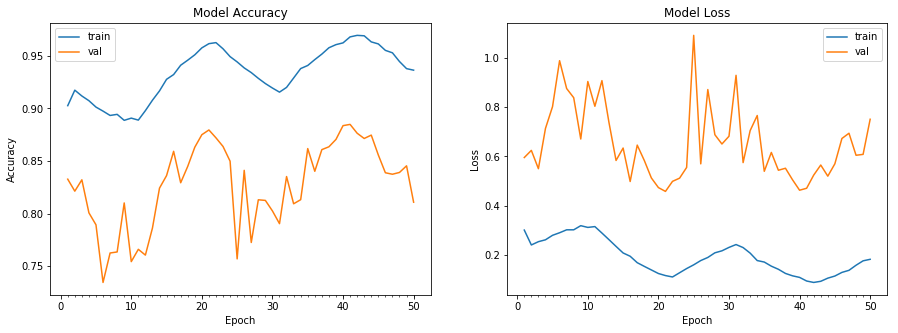

Accuracy on test data is: 0.00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


In [151]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(preprocessing_function=get_random_eraser(v_l=0, v_h=1))


#Initialize Cyclic Learning Rate
from keras.callbacks import *
clr_triangular = CyclicLR(mode='triangular')

# train the model
start = time.time()
# Train the model
model_info = saved_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 callbacks=[clr_triangular,checkpoint],
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, saved_model))

## HeatMap utility functions

In [0]:
import cv2

from keras.preprocessing import image
from google.colab.patches import cv2_imshow

def get_heatmap(conv_layer_output_value, axis=1):
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  return heatmap

def convert_to_png(image_3dim):
  '''
  accepts 3D image
  '''
  converted_img = image.image.array_to_img(image_3dim)
  converted_img.save('drive/My Drive/EVA-MachineLearning/Assignment_9a_test1.png')
  loaded_img = cv2.imread('drive/My Drive/EVA-MachineLearning/Assignment_9a_test1.png')
  return loaded_img

def predict_class(image, model):
  '''
  image 4D
  '''
  class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

  y_pred = model.predict(image)

  # argmax returns the max value in the array
  class_idx = np.argmax(np.round(y_pred),axis=1)[0]
  print('predicted class: ', class_names[class_idx])
  return class_idx

def get_conv_layer_output_value(img_four_dim,class_output, last_conv_layer):
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([saved_model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([img_four_dim])
  for i in range(10):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  return conv_layer_output_value

def display_img(image, heatmap):
  '''
  accepts png
  '''
  
  heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
  superimposed_img = cv2.addWeighted(image, 0.6, heatmap, 0.4, 0)
  
  fig = plt.figure(figsize=(8,3))
  ax = fig.add_subplot(2, 2, 1, xticks=[], yticks=[])
  plt.imshow(image)
  plt.show()
  plt.imshow(superimposed_img)
  ax = fig.add_subplot(2, 2, 2, xticks=[], yticks=[])

  plt.show()
  
  
def display_test_img_with_heat_signs(test_img_index, trained_model):
  test_img = test_features[test_img_index]
  im_four_dim = np.expand_dims(test_img, axis=0)
  class_idx = predict_class(im_four_dim, saved_model)
  
  class_output = saved_model.output[:, class_idx]
  conv_layer_output_value = get_conv_layer_output_value(im_four_dim, class_output, last_conv_layer)
  
  heatmap = get_heatmap(conv_layer_output_value)
  
  png_img = convert_to_png(test_img)
  
  display_img(png_img, heatmap)



##HeatMap Images with without CutOut

In [54]:
from keras.models import load_model

filepath = r'/content/drive/My Drive/EVA-MachineLearning/Assignment-6A-model_weights.hdf5'
saved_model = load_model(filepath)
# saved_model.summary()

last_conv_layer = saved_model.get_layer("conv2d_23")

score = saved_model.evaluate(test_features, test_labels, verbose=0)
print(score)

# for im_three_dim in lst_imgs_three_dim:  
#   display_test_img_with_heat_signs(im_three_dim, saved_model)

[0.5743751900345087, 0.8648]


predicted class:  frog


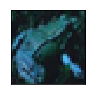

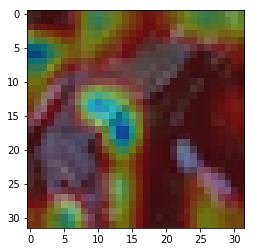

In [55]:
display_test_img_with_heat_signs(41, saved_model)

predicted class:  automobile


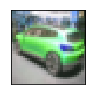

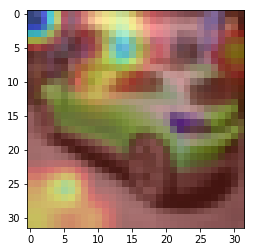

In [13]:
display_test_img_with_heat_signs(440, saved_model)

predicted class:  dog


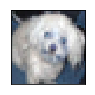

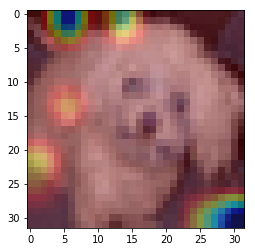

In [14]:
display_test_img_with_heat_signs(1000, saved_model)

predicted class:  horse


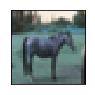

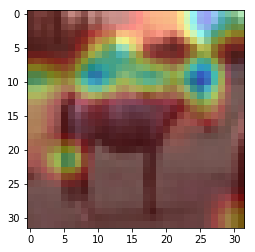

In [29]:
display_test_img_with_heat_signs(9999, saved_model)

# HeatMap : Utility Functions & Model Loading

In [59]:
# Load Models with and without CutOut
from keras.models import load_model

without_cutout_filepath = r'/content/drive/My Drive/EVA-MachineLearning/Assignment-6A-model_weights.hdf5'
with_cutout_filepath = r'/content/drive/My Drive/EVA-MachineLearning/Assignment-6A-model_weights_after_cutout.hdf5'
model_without_cutout = load_model(without_cutout_filepath)
model_with_cutout = load_model(with_cutout_filepath)
model_with_cutout.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 96)        55392     
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 96)        384       
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 96)        0         
__________

In [72]:
# Evaluate the test features with the 'model without cutout'
last_conv_layer = model_without_cutout.get_layer("conv2d_23")
score = model_without_cutout.evaluate(test_features, test_labels, verbose=0)
print(score)

[0.5743751900345087, 0.8648]


In [61]:
# Evaluate the test features with the 'model with cutout'
last_conv_layer = model_with_cutout.get_layer("conv2d_23")
score = model_with_cutout.evaluate(test_features, test_labels, verbose=0)
print(score)

[0.470429575830698, 0.8848]


# HeatMap - Frog Class

predicted class:  frog


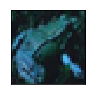

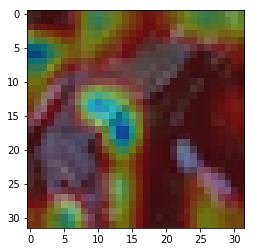

In [73]:
# Model without Cutout
saved_model = model_without_cutout
display_test_img_with_heat_signs(41, saved_model)

predicted class:  frog


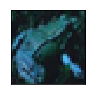

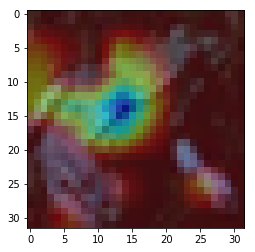

In [62]:
# Model with Cutout
saved_model = model_with_cutout
display_test_img_with_heat_signs(41, saved_model)

# HeatMap - Dog Class

predicted class:  dog


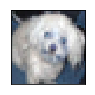

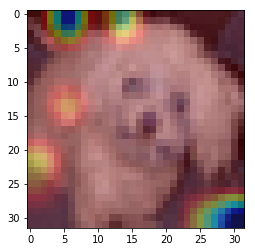

In [75]:
# Model without Cutout
saved_model = model_without_cutout
display_test_img_with_heat_signs(1000, saved_model)

predicted class:  dog


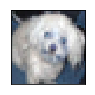

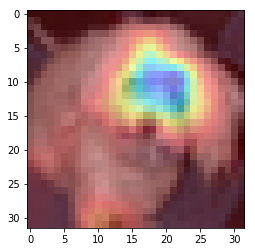

In [67]:
# Model with Cutout
saved_model = model_with_cutout
display_test_img_with_heat_signs(1000, saved_model)

# HeatMap - Horse class

predicted class:  horse


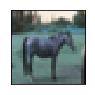

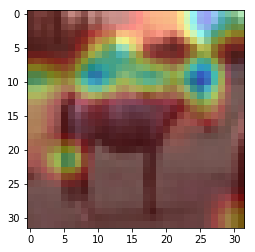

In [76]:
# Model without Cutout
saved_model = model_without_cutout
display_test_img_with_heat_signs(9999, saved_model)

predicted class:  horse


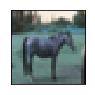

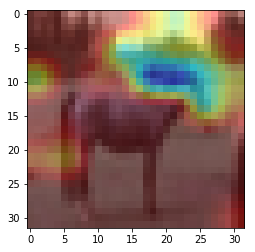

In [70]:
# Model with Cutout
saved_model = model_with_cutout
display_test_img_with_heat_signs(9999, saved_model)

#HeatMap - Automobile Class

While cutout improved identifying the correct features in above classes significantly, automobile class - proves every class cannot be complemented with a same cutout. May be we have to change cutout for automobile class specifically as we can see automobile class didnt learn much from cutout which we applied

predicted class:  automobile


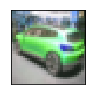

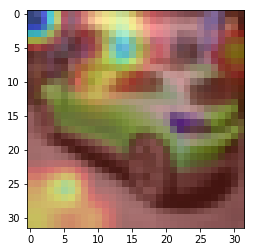

In [74]:
# Model without Cutout
saved_model = model_without_cutout
display_test_img_with_heat_signs(440, saved_model)

predicted class:  automobile


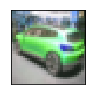

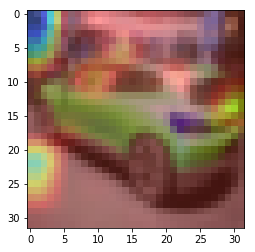

In [65]:
# Model with Cutout
saved_model = model_without_cutout
display_test_img_with_heat_signs(440, saved_model)